In [1]:
import pandas as pd

# Load the dataset
data = pd.read_excel("Bankruptcy.xlsx")

# Display the first few rows of the dataset
data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [2]:
# Get basic information about the dataset
data.info()


# Check for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [3]:
# Get summary statistics of the dataset
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


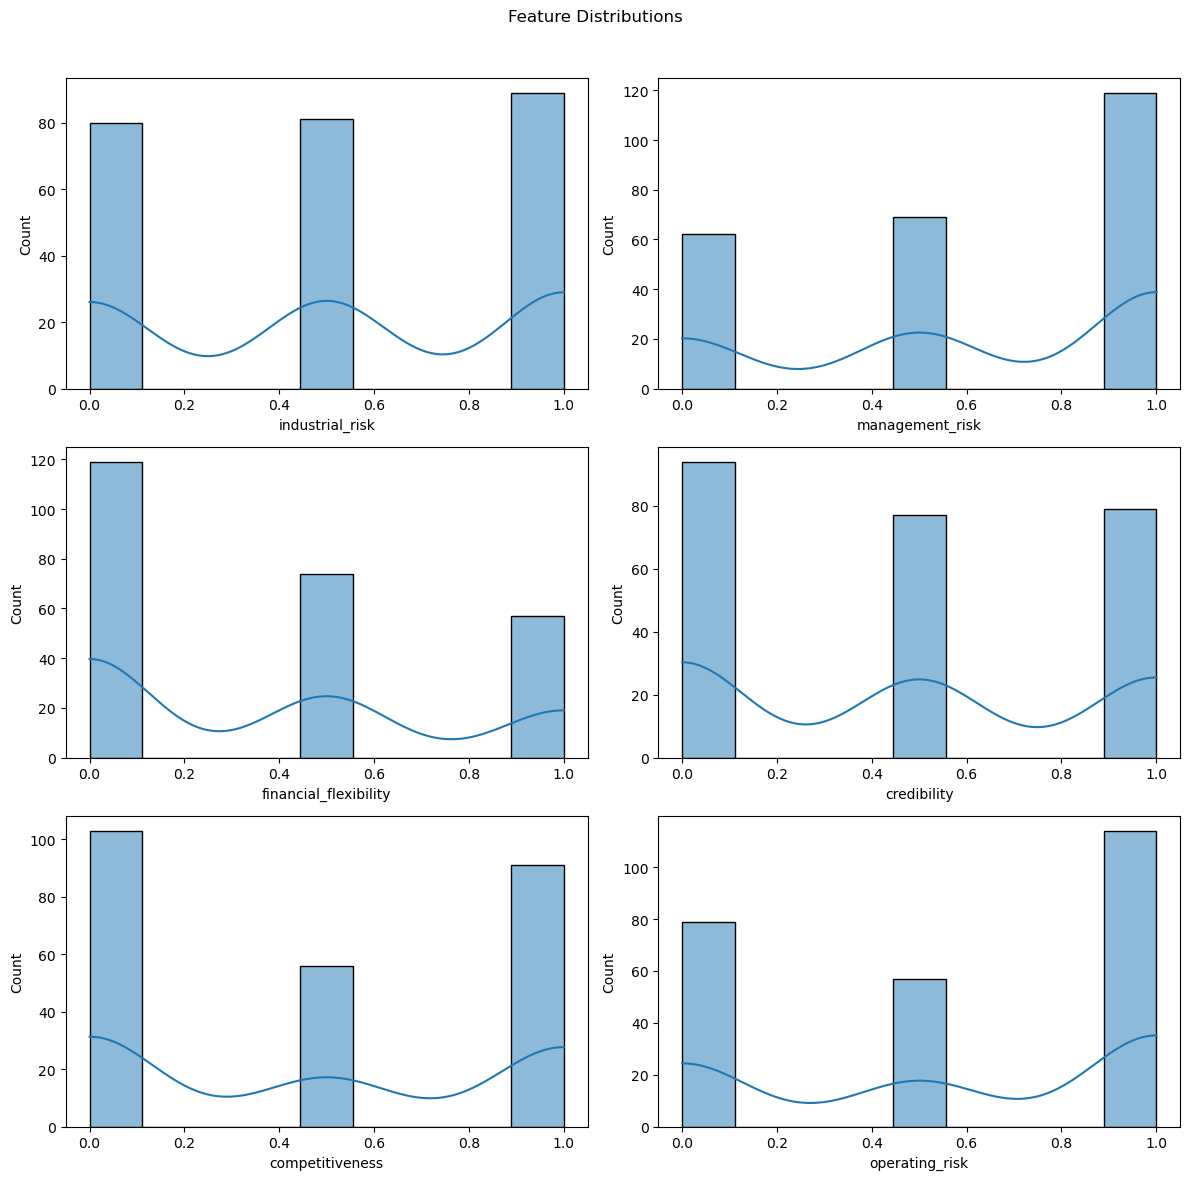

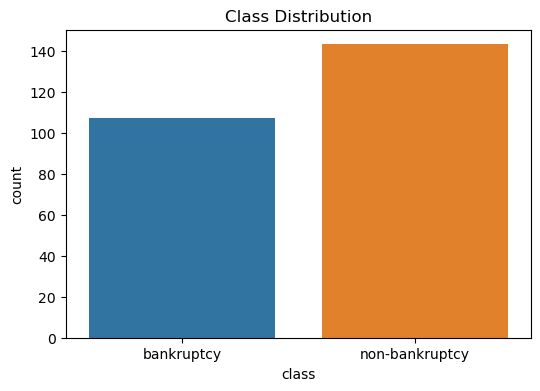

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Feature Distributions')

sns.histplot(data['industrial_risk'], kde=True, ax=axes[0, 0])
sns.histplot(data['management_risk'], kde=True, ax=axes[0, 1])
sns.histplot(data['financial_flexibility'], kde=True, ax=axes[1, 0])
sns.histplot(data['credibility'], kde=True, ax=axes[1, 1])
sns.histplot(data['competitiveness'], kde=True, ax=axes[2, 0])
sns.histplot(data['operating_risk'], kde=True, ax=axes[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=data)
plt.title('Class Distribution')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Encode the target variable
data['class'] = data['class'].map({'non-bankruptcy': 0, 'bankruptcy': 1})

# Split the data into training and testing sets
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 1.0
Confusion Matrix:
[[29  0]
 [ 0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [6]:
import joblib

# Save the trained model to a file
model_filename = 'bankruptcy_model.pkl'
joblib.dump(model, model_filename)


['bankruptcy_model.pkl']